Decision Tree:
--------------

A decision tree is a graph that uses a branching method to illustrate every possible outcome of a decision.

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree

In [2]:
past_hires_df = pd.read_csv("PastHires.csv")
past_hires_df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [3]:
d = {'Y': 1, 'N': 0}
past_hires_df["Employed?"] = past_hires_df["Employed?"].map(d)
past_hires_df["Top-tier school"] = past_hires_df["Top-tier school"].map(d)
past_hires_df["Interned"] = past_hires_df["Interned"].map(d)
past_hires_df["Hired"] = past_hires_df["Hired"].map(d)

edu = {'BS': 0, 'MS': 1, 'PhD': 2}
past_hires_df["Level of Education"] = past_hires_df["Level of Education"].map(edu)

past_hires_df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [5]:
# Next we need to seperate features from target
features = list(past_hires_df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [6]:
# Now actually construct the decision tree
y = past_hires_df["Hired"]
X = past_hires_df[features]

In [7]:
model = tree.DecisionTreeClassifier()

In [9]:
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [10]:
# To display the decision tree flowchart - Not important
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydot'

Ensemble Learning: Using Random Forests
---------------------------------------------

Random forests: Random Forest works by averaging decision tree output. It also ranks an individual tree’s output, by comparing it to the known output from the training data. This allows it to rank features. Some of the decision trees will perform better, and so the features within the tree will be deemed more important.

Bagging: Bagging is a technique used to reduce the variance of our predictions by combining the result of multiple classifiers modeled on different sub-samples of the same data set.

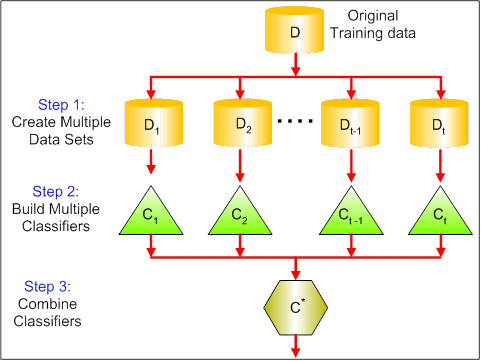

In [3]:
from IPython.display import Image, display
Image(data = "bagging.png")

In [11]:
# We will use a random forest of 10 decision trees to predict employment of specific candidate profiles:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
model = model.fit(X, y)

# Predict employability of an employed candidate with 10 year experience
print(model.predict([10, 1, 4, 0, 0, 0]))
#  Predict employability of an un-employed candidate with 10 year experience
print(model.predict([10, 0, 4, 0, 0, 0]))

[1]
[0]


/home/cn87/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/cn87/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
